In [1]:
# Import packages
import glob
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
from pathlib import Path

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [4]:
# Create filepaths for the laptop battery and mormal battery images
filepath_laptop = "image/battery/laptop/*"
filepath_normal = "image/battery/normal/*"


In [5]:
# Collect all the image filepaths into lists
laptop_files = [file for file in glob.iglob(filepath_laptop)]
normal_files = [file for file in glob.iglob(filepath_normal)]


In [6]:
normal_files

['image/battery/normal/battery542.jpg',
 'image/battery/normal/battery608.jpg',
 'image/battery/normal/battery83.jpg',
 'image/battery/normal/battery133.jpg',
 'image/battery/normal/battery554.jpg',
 'image/battery/normal/battery623.jpg',
 'image/battery/normal/battery694.jpg',
 'image/battery/normal/battery215.jpg',
 'image/battery/normal/battery638.jpg',
 'image/battery/normal/battery199.jpg',
 'image/battery/normal/battery123.jpg',
 'image/battery/normal/battery690.jpg',
 'image/battery/normal/battery653.jpg',
 'image/battery/normal/battery182.jpg',
 'image/battery/normal/battery547.jpg',
 'image/battery/normal/battery223.jpg',
 'image/battery/normal/battery46.jpg',
 'image/battery/normal/battery744.jpg',
 'image/battery/normal/battery703.jpg',
 'image/battery/normal/battery142.jpg',
 'image/battery/normal/battery648.jpg',
 'image/battery/normal/battery764.jpg',
 'image/battery/normal/battery222.jpg',
 'image/battery/normal/battery48.jpg',
 'image/battery/normal/battery822.jpg',
 'i

In [7]:
#Create input(data) and output(target) dataset
#Label laptop battery as 1, and normal battery as 0

data = []
target = []

for lap in range(len(laptop_files)):
    img = load_img(laptop_files[lap], target_size = (224, 224))
    x = np.array(img)
    data.append(x)
    target.append(1) #Pizza: Label 1

for nor in range(len(normal_files)):
    img = load_img(normal_files[nor], target_size = (224, 224))
    x = np.array(img)
    data.append(x)
    target.append(0) #Apple pie: Label 0

In [8]:
data = np.array(data)
target = np.array(target)

In [9]:
data

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [255, 255, 255],
        

In [10]:
data.shape

(851, 224, 224, 3)

In [11]:
target.shape

(851,)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Separate data and target into train and test data.
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                    test_size = 0.2, #80/20
                                                    random_state = 0)

In [14]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [15]:
x_train[291].shape

(224, 224, 3)

In [16]:
len(x_train)

680

In [17]:
len(x_test)

171

In [18]:
x_train = x_train.reshape(680, 224, 224, 3) / 255
x_test = x_test.reshape(171, 224, 224, 3) / 255

In [19]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

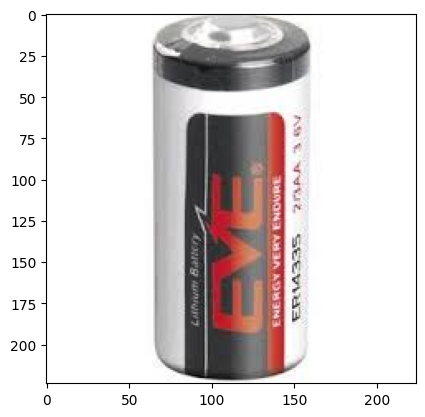

In [20]:
plt.imshow(x_train[291], cmap='Greys')

In [21]:
model = Sequential()
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

I0000 00:00:1757690394.220796  461228 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 191866 MB memory:  -> device: 0, name: AMD Instinct MI300X, pci bus id: 0000:c6:00.0


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50


I0000 00:00:1757690407.290241  461814 service.cc:148] XLA service 0x7f4844017530 initialized for platform ROCM (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757690407.290325  461814 service.cc:156]   StreamExecutor device (0): AMD Instinct MI300X, AMDGPU ISA version: gfx942:sramecc+:xnack-
2025-09-12 15:20:07.318317: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1757690422.267994  461814 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6188 - loss: 5.5490
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6792 - loss: 0.6227
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7998 - loss: 0.4284
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8513 - loss: 0.3464
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9007 - loss: 0.2366
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9139 - loss: 0.2246
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9560 - loss: 0.1456
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9785 - loss: 0.0925
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9882 - loss: 0.0563
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9919 - loss: 0.0323
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9966 - loss: 0.0246
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9984 - loss: 0.0123
Epoch 13/50
7

In [25]:
score = model.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8778 - loss: 0.4944


In [28]:
predict = model.predict(x_test)
y_predict = np.argmax(model.predict(x_test), axis = -1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


The prediction of CNN is: 0


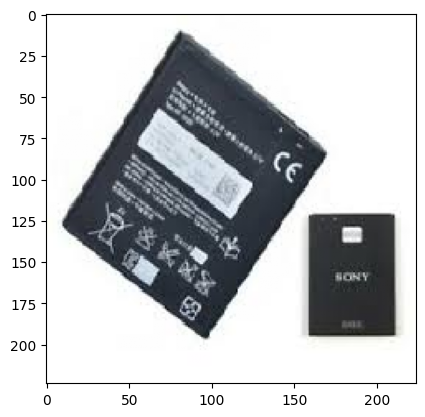

In [29]:
w = 10
print('The prediction of CNN is:', y_predict[w])
plt.imshow(x_test[w].reshape(224,224,3), cmap='Greys');

In [30]:
model.save('models/battery_01/battery.keras')

FileNotFoundError: [Errno 2] No such file or directory: 'models/battery_01/battery.keras'